In [24]:
% matplotlib inline

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
sns.set_style("ticks")
sns.set_palette(sns.color_palette("dark", 8))

In [3]:
z = pd.read_csv("./india_processed.csv")

In [4]:
states = set(z["state_names"])

In [5]:
counts = dict(z.groupby("state_names")["id"].count())

In [6]:
sorted(counts.items(), key=lambda z: z[1], reverse=True)

[('Uttar Pradesh', 92588),
 ('Madhya Pradesh', 49063),
 ('Rajasthan', 41477),
 ('Maharashtra', 32280),
 ('Bihar', 31814),
 ('Odisha', 29883),
 ('Jharkhand', 27399),
 ('West Bengal', 26404),
 ('Assam', 23005),
 ('Chhattisgarh', 17891),
 ('Himachal Pradesh', 17572),
 ('Uttarakhand', 14982),
 ('Gujarat', 14039),
 ('Punjab', 12110),
 ('Andhra Pradesh', 12105),
 ('Karnataka', 10258),
 ('Telangana', 9821),
 ('Haryana', 6579),
 ('Jammu and Kashmir', 5727),
 ('Meghalaya', 5626),
 ('Arunachal Pradesh', 4362),
 ('Manipur', 2373),
 ('Nagaland', 1347),
 ('Tripura', 858),
 ('Mizoram', 447),
 ('Sikkim', 423),
 ('Puducherry', 136),
 ('NCT of Delhi', 111),
 ('Dadra and Nagar Haveli', 68),
 ('Chandigarh', 11),
 ('Goa', 1)]

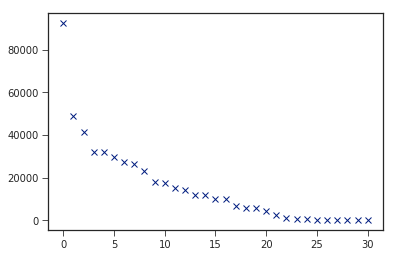

In [22]:
plt.plot(sorted(counts.values(), reverse=True), "x")

In [20]:
top_states = sorted(counts.keys(), key=lambda z: counts[z], reverse=True)[:16]

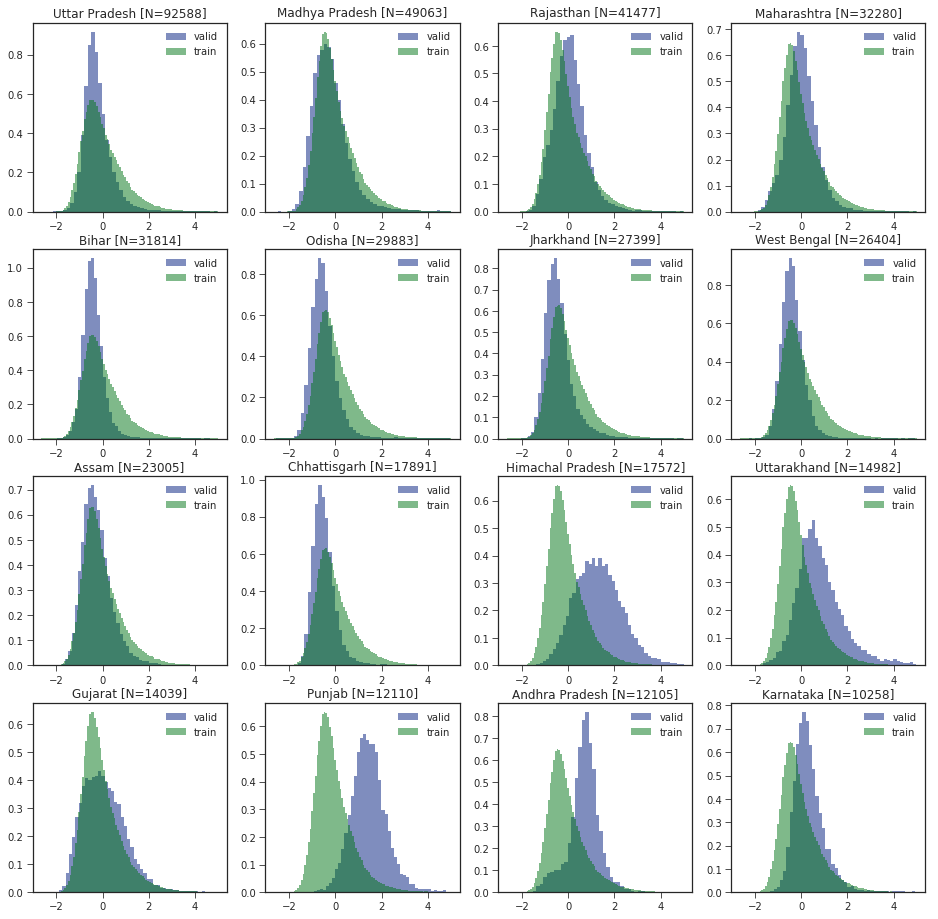

In [23]:
plt.figure(figsize=(16,16))
for i, s in enumerate(top_states):
  plt.subplot(4, 4, i + 1)
  in_sample = z[z["state_names"] == s]["secc_cons_per_cap_scaled"]
  out_sample = z[z["state_names"] != s]["secc_cons_per_cap_scaled"]
  plt.hist(in_sample[in_sample < 5], normed=True, bins=50, alpha=0.5, label="valid")
  plt.hist(out_sample[out_sample < 5], normed=True, bins=100, alpha=0.5, label="train");
  plt.title(s + " [N={}]".format(counts[s]))
  plt.legend()

In [8]:
s = "Madhya Pradesh"

In [9]:
in_sample = z[z["state_names"] == s]["secc_cons_per_cap_scaled"]
out_sample = z[z["state_names"] != s]["secc_cons_per_cap_scaled"]

In [110]:
z[z["state_names"] != s].to_csv("./valid_madhya/india_train.csv")